In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import time
import shutil
import pathlib
import itertools
from PIL import Image
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, GaussianNoise, 
                                     Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, GaussianNoise, 
                                     Input, MultiHeadAttention, Reshape)


In [2]:
from colorama import Fore

In [3]:
import os
for dirname, _, filenames in os.walk('Diagnosis of Diabetic Retinopathy'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Diagnosis of Diabetic Retinopathy\test\DR\00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg
Diagnosis of Diabetic Retinopathy\test\DR\0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg
Diagnosis of Diabetic Retinopathy\test\DR\03747397839f_png.rf.b634cf9fb09372b2c9c6bc6616bd5d7c.jpg
Diagnosis of Diabetic Retinopathy\test\DR\04d029cfb612_png.rf.d9cf2e2a4e995a99b83e2595d66db6d2.jpg
Diagnosis of Diabetic Retinopathy\test\DR\0ada12c0e78f_png.rf.3e8e491a2cacb9af201e2f89f3afca61.jpg
Diagnosis of Diabetic Retinopathy\test\DR\0bf37ca3156a_png.rf.5fd49da65121f9fd951a208b5f085744.jpg
Diagnosis of Diabetic Retinopathy\test\DR\0f495d87656a_png.rf.707a2bb8a1223a714fcb88d67eb153c0.jpg
Diagnosis of Diabetic Retinopathy\test\DR\1177d583c807_png.rf.ecb8848ab217877e4877c8034c59b198.jpg
Diagnosis of Diabetic Retinopathy\test\DR\1411c8ab7161_png.rf.892f5c081e1fb52861ed50975fc3a444.jpg
Diagnosis of Diabetic Retinopathy\test\DR\144b01e7b993_png.rf.7307219cfcd0b42b5aec3c5f067bf949.jpg
Diagnosis 

In [4]:
base_path = "Diagnosis of Diabetic Retinopathy/train"
categories = ["DR", "No_DR"]

In [5]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [6]:
df.head()

,image_path,label
0,Diagnosis of Diabetic Retinopathy/train\DR\000...,DR
1,Diagnosis of Diabetic Retinopathy/train\DR\001...,DR
2,Diagnosis of Diabetic Retinopathy/train\DR\002...,DR
3,Diagnosis of Diabetic Retinopathy/train\DR\008...,DR
4,Diagnosis of Diabetic Retinopathy/train\DR\00a...,DR


In [7]:
df.tail()

,image_path,label
2071,Diagnosis of Diabetic Retinopathy/train\No_DR\...,No_DR
2072,Diagnosis of Diabetic Retinopathy/train\No_DR\...,No_DR
2073,Diagnosis of Diabetic Retinopathy/train\No_DR\...,No_DR
2074,Diagnosis of Diabetic Retinopathy/train\No_DR\...,No_DR
2075,Diagnosis of Diabetic Retinopathy/train\No_DR\...,No_DR


In [8]:
df.shape

(2076, 2)

In [9]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2076 non-null   object
 1   label       2076 non-null   object
dtypes: object(2)
memory usage: 32.6+ KB


In [13]:
df.nunique()

image_path    2076
label            2
dtype: int64

In [14]:
df['label'].unique()

array(['DR', 'No_DR'], dtype=object)

In [15]:
df['label'].value_counts()

label
DR       1050
No_DR    1026
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_12648\2697431599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis")


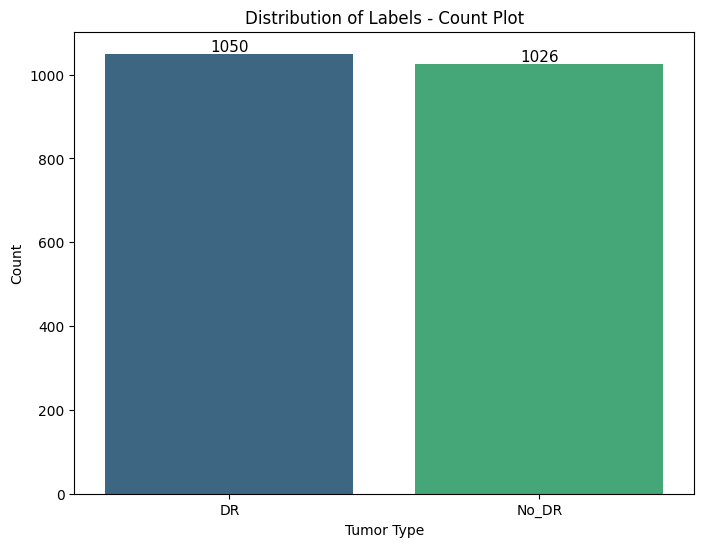

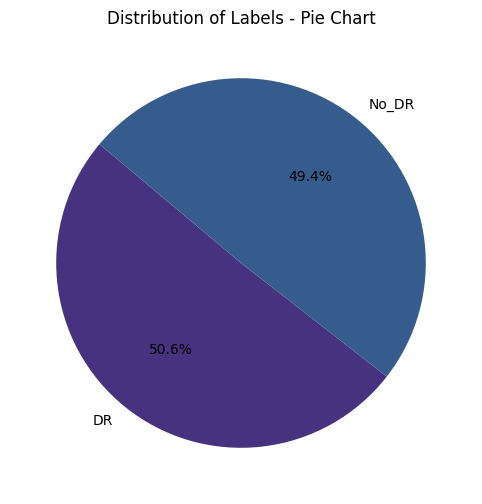

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

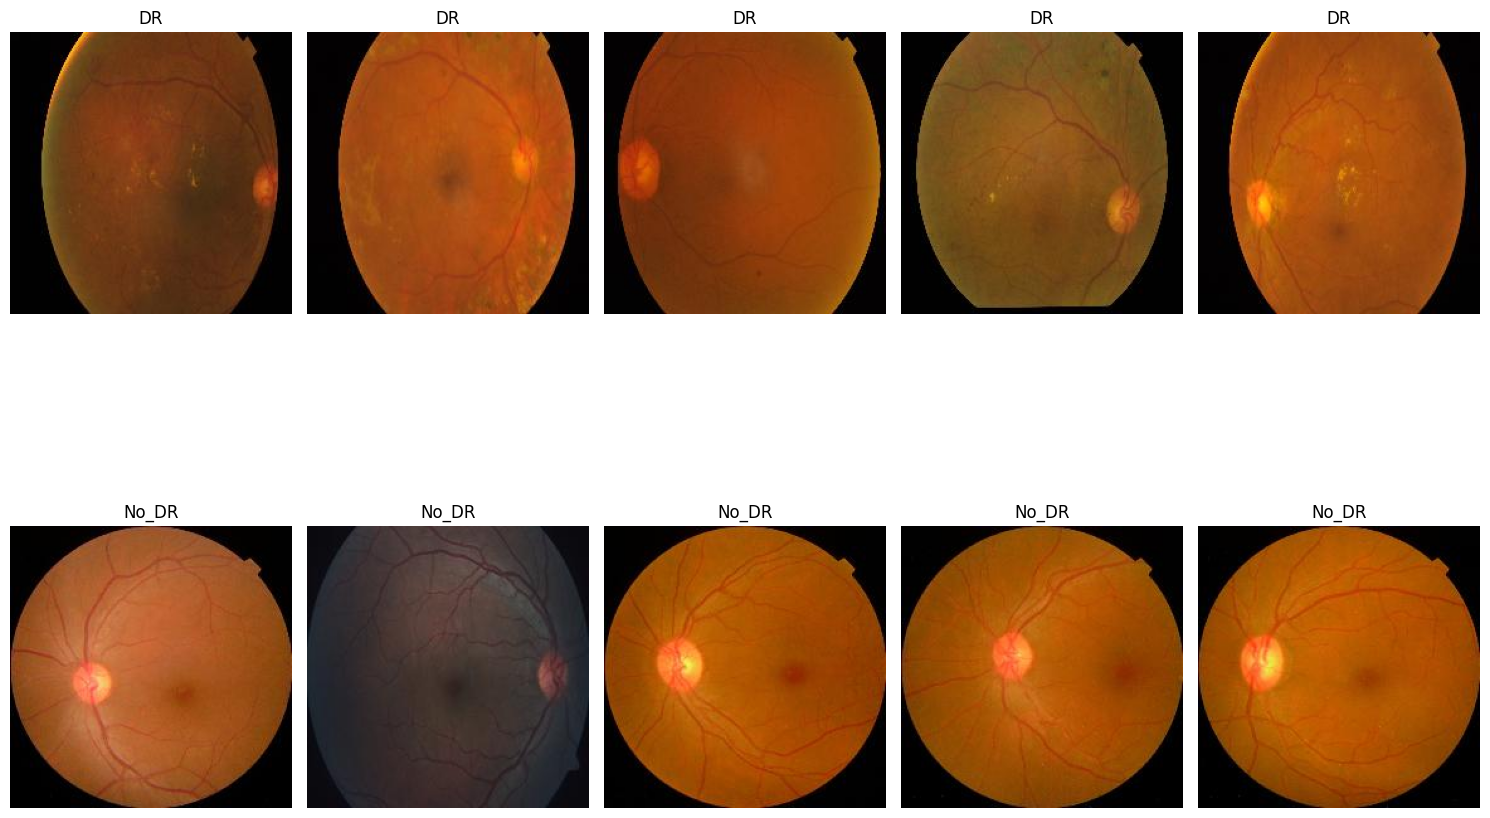

In [17]:
num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [18]:
label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [19]:
df = df[['image_path', 'category_encoded']]

In [20]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [21]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [22]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    1050
1    1050
Name: count, dtype: int64


In [23]:
df_resampled

,image_path,category_encoded
0,Diagnosis of Diabetic Retinopathy/train\DR\000...,0
1,Diagnosis of Diabetic Retinopathy/train\DR\001...,0
2,Diagnosis of Diabetic Retinopathy/train\DR\002...,0
3,Diagnosis of Diabetic Retinopathy/train\DR\008...,0
4,Diagnosis of Diabetic Retinopathy/train\DR\00a...,0
...,...,...
2095,Diagnosis of Diabetic Retinopathy/train\No_DR\...,1
2096,Diagnosis of Diabetic Retinopathy/train\No_DR\...,1
2097,Diagnosis of Diabetic Retinopathy/train\No_DR\...,1
2098,Diagnosis of Diabetic Retinopathy/train\No_DR\...,1


In [24]:
sns.set_style('darkgrid')

In [25]:
import warnings
warnings.filterwarnings("ignore")

print ('Check.........')

Check.........


In [26]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [27]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [28]:
batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 1680 validated image filenames belonging to 2 classes.
Found 210 validated image filenames belonging to 2 classes.
Found 210 validated image filenames belonging to 2 classes.


In [29]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [31]:
def create_vgg16_model(input_shape):
    inputs = Input(shape=input_shape)
    
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512  
    x = Reshape((height * width, channels))(x)
    
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(512, activation='relu')(x)
    x = GaussianNoise(0.25)(x)  
    x = Dropout(0.25)(x)  
    
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg16_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [32]:
start_time = time.time()
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)
end_time = time.time()

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7229 - loss: 0.4990 - val_accuracy: 0.9143 - val_loss: 0.2078
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9193 - loss: 0.2344 - val_accuracy: 0.9286 - val_loss: 0.1807
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9179 - loss: 0.2284 - val_accuracy: 0.9286 - val_loss: 0.1594
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9329 - loss: 0.1814 - val_accuracy: 0.9429 - val_loss: 0.1432
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9417 - loss: 0.1810 - val_accuracy: 0.9476 - val_loss: 0.1391


In [33]:
inference_time = end_time - start_time
print(f"Inference time: {inference_time:.4f} seconds")

Inference time: 1011.4659 seconds


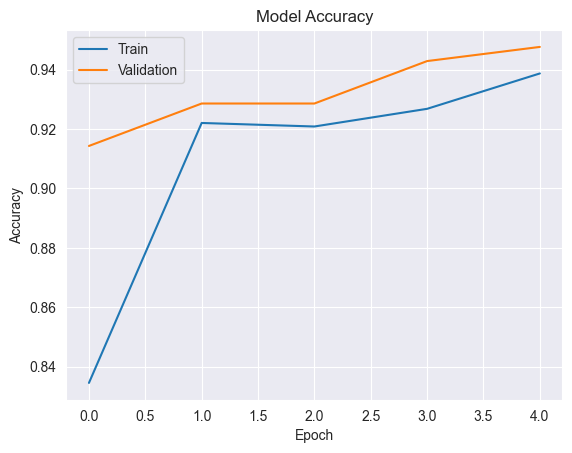

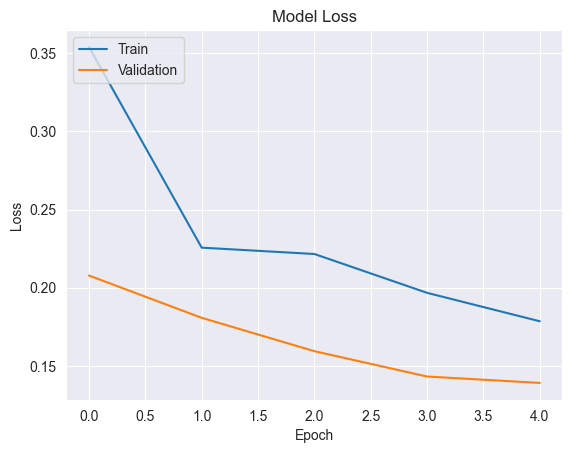

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


In [36]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(Fore.RED + "Report for VGG16 Model => ")
print(report)

Report for VGG16 Model => 
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       105
           1       0.90      0.99      0.95       105

    accuracy                           0.94       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.94      0.94       210



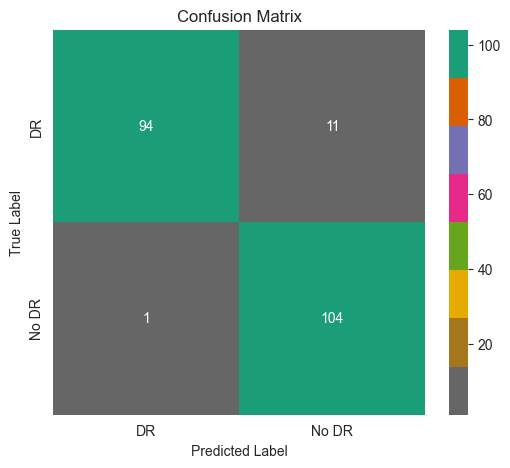

In [37]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Dark2_r', xticklabels=['DR', 'No DR'], yticklabels=['DR', 'No DR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
def create_lightweight_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = MobileNetV2(weights='imagenet', input_tensor=inputs, include_top=False)
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels))(x)
    attention_output = MultiHeadAttention(num_heads=4, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)
    x = GaussianNoise(0.2)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = GaussianNoise(0.2)(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_lightweight_model(input_shape)
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [39]:
start_time = time.time()
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)
end_time = time.time()

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 81s 694ms/step - accuracy: 0.8399 - loss: 0.3426 - val_accuracy: 0.9476 - val_loss: 0.1231
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 673ms/step - accuracy: 0.9575 - loss: 0.1291 - val_accuracy: 0.9571 - val_loss: 0.1045
Epoch 3/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 677ms/step - accuracy: 0.9673 - loss: 0.1096 - val_accuracy: 0.9714 - val_loss: 0.1230
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 72s 685ms/step - accuracy: 0.9765 - loss: 0.0878 - val_accuracy: 0.9667 - val_loss: 0.0944
Epoch 5/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 71s 672ms/step - accuracy: 0.9758 - loss: 0.0705 - val_accuracy: 0.9714 - val_loss: 0.1317


In [40]:
inference_time = end_time - start_time
print(f"Inference time: {inference_time:.4f} seconds")

Inference time: 365.3900 seconds


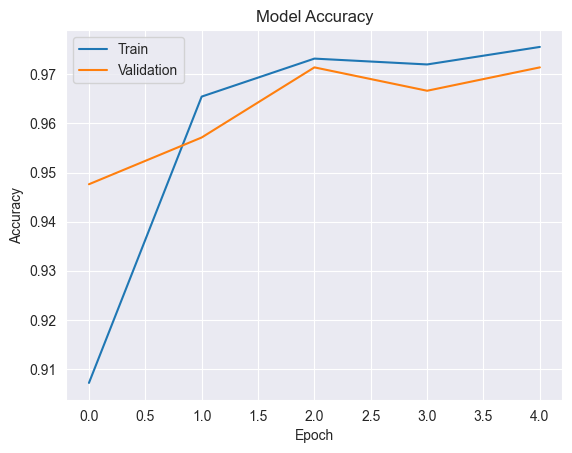

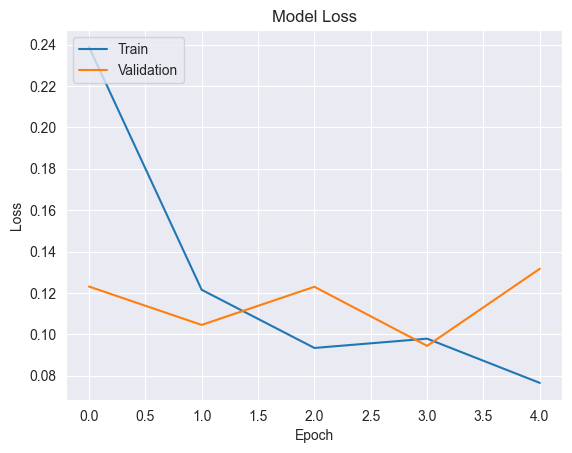

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_labels = (predictions > 0.5).astype(int).flatten()

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step


In [43]:
report = classification_report(test_labels, predicted_labels, target_names=list(test_gen_new.class_indices.keys()))
print(Fore.RED + "Report for MobileNet Model => ")
print(report)

Report for LightWight Model => 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.95      0.96      0.96       105

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



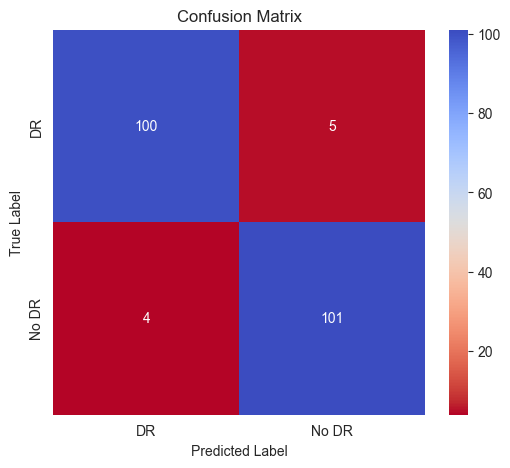

In [44]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm_r', xticklabels=['DR', 'No DR'], yticklabels=['DR', 'No DR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()